In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('./data/train.csv',header=0)
test = pd.read_csv('./data/test.csv',header=0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Dictionary

In [3]:
info = ['乘客ID','Survived','Ticket class票类','name','sex','age','of siblings / spouses aboard the Titanic','of parents / children aboard the Titanic',
       'Ticket number',' Passenger fare','Cabin number','Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton']
pd.Series(info,index=train.columns)

PassengerId                                                 乘客ID
Survived                                                Survived
Pclass                                            Ticket class票类
Name                                                        name
Sex                                                          sex
Age                                                          age
SibSp                   of siblings / spouses aboard the Titanic
Parch                   of parents / children aboard the Titanic
Ticket                                             Ticket number
Fare                                              Passenger fare
Cabin                                               Cabin number
Embarked       Port of Embarkation C = Cherbourg, Q = Queenst...
dtype: object

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 缺失数据

#Age 714 non-null float64

#Cabin 204 non-null object

#Embarked 889 non-null object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Sex'].value_counts(dropna=False)
#train['Sex']=train['Sex'].replace(['male','female'],[0,1])
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

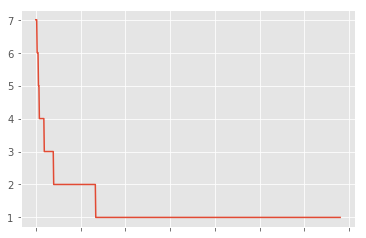

In [8]:
train['Ticket'].value_counts().plot()

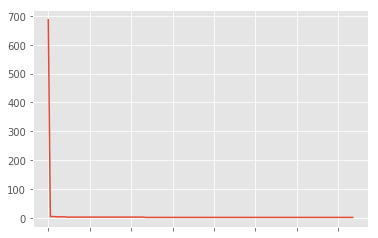

In [10]:
train['Cabin'].value_counts(dropna=False).plot()

In [11]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [12]:
#train['Embarked']=train['Embarked'].replace(['S','C','Q',np.nan],[0,1,2,3])
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

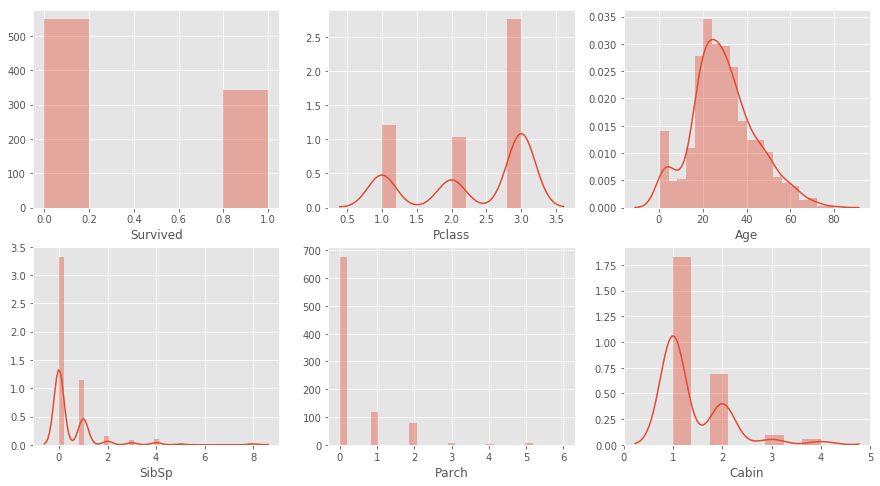

In [13]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(231)
sns.distplot(train['Survived'],kde=False,ax=ax1);
ax2=fig.add_subplot(232)
sns.distplot(train['Pclass']);
ax3=fig.add_subplot(233)
sns.distplot(train['Age'].dropna())
ax4=fig.add_subplot(234)
sns.distplot(train['SibSp'])
ax5=fig.add_subplot(235)
sns.distplot(train['Parch'],kde=False)
ax6=fig.add_subplot(236)
sns.distplot(train['Cabin'].value_counts())

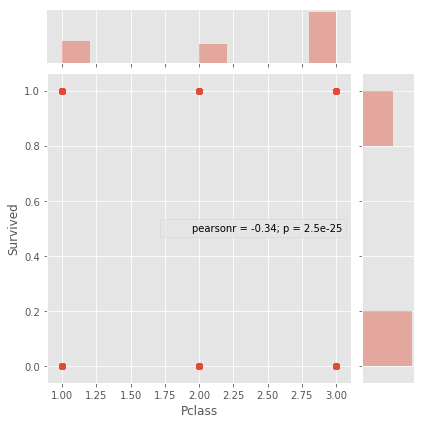

In [14]:
sns.jointplot(x='Pclass',y='Survived',data=train[['Pclass','Survived']])

In [15]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [16]:
train['Embarked'].fillna('N',inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
from sklearn.ensemble import RandomForestRegressor
def fill_missing_Age(train):
    train = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
    known_age = train['Age'].notnull()
    unknown_age = train['Age'].isnull()
    
    x_train = train.loc[known_age,['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
    y_train = train.loc[known_age,['Age']]
    
    x_test = train.loc[unknown_age,['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
    
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    
    rfr.fit(x_train,y_train)
    predicted_age = rfr.predict(x_test)
    
    train.loc[unknown_age,'Age'] = predicted_age
    return train['Age'],rfr

In [19]:
Age,rfr = fill_missing_Age(train)
train['Age'] = Age

ValueError: could not convert string to float: 'Q'

In [ ]:
def fill_mising_cabin(train):
    Cabin = train['Cabin'].notnull()
    Nan_cabin = train['Cabin'].isnull()
    train.loc[Cabin,'Cabin'] = 0
    train.loc[Nan_cabin,'Cabin'] = 1
    return Cabin

In [ ]:
train['Cabin'] = fill_mising_cabin(train)
train['Cabin'].value_counts()

In [ ]:
train.info()

In [ ]:
train.head()

In [20]:
# pd.get_dummies(train[['Pclass','Sex','SibSp','Parch','Cabin','Embarked']],
#                          prefix=['Pclass','Sex','SibSp','Parch','Cabin','Embarked'])
dummied_Pclass = pd.get_dummies(train['Pclass'],prefix='Pclass')
dummied_Sex = pd.get_dummies(train['Sex'],prefix='Sex')
dummied_SibSp = pd.get_dummies(train['SibSp'],prefix='SibSp')
dummied_Parch = pd.get_dummies(train['Parch'],prefix='Parch')
dummied_Cabin = pd.get_dummies(train['Cabin'],prefix='Cabin')
dummied_Embarked = pd.get_dummies(train['Embarked'],prefix='Embarked')
train = pd.concat([train,dummied_Pclass,dummied_Sex,dummied_SibSp,dummied_Parch,dummied_Cabin,dummied_Embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
x_train = train.filter(regex='Pclass_.*|Sex_.*|Age_.*}SibSp_.*|Parch_.*|Fare_.*|Cabin_.*|Embarked_.*')
y_train = train['Survived']
x_train.head()

In [ ]:
from sklearn import linear_model

# Plotting Learning Curves

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [ ]:
X = x_train
y = y_train



title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

lr = linear_model.LogisticRegression(C=1.0,tol=1e-10,max_iter=1000,n_jobs=-1)
plot_learning_curve(lr, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

In [46]:
import numpy as np
import pandas as pd
from pandas import  DataFrame
from patsy import dmatrices
import string
from operator import itemgetter
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn import preprocessing

##Read configuration parameters

train_file="./data/train.csv"
MODEL_PATH="./data/"
test_file="test.csv"
SUBMISSION_PATH="./data/"
seed= 0

print(train_file,seed)

# 输出得分
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

#清理和处理数据
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

le = preprocessing.LabelEncoder()
enc=preprocessing.OneHotEncoder()

def clean_and_munge_data(df):
    #处理缺省值
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    #处理一下名字，生成Title字段
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))

    #处理特殊的称呼，全处理成mr, mrs, miss, master
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Master']:
            return 'Master'
        elif title in ['Countess', 'Mme','Mrs']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms','Miss']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='Male':
                return 'Mr'
            else:
                return 'Mrs'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master'
            else:
                return 'Miss'
        else:
            return title

    df['Title']=df.apply(replace_titles, axis=1)

    #看看家族是否够大，咳咳
    df['Family_Size']=df['SibSp']+df['Parch']
    df['Family']=df['SibSp']*df['Parch']


    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] =np.median(df[df['Pclass'] == 1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] =np.median( df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())

    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    df['AgeFill']=df['Age']
    mean_ages = np.zeros(4)
    mean_ages[0]=np.average(df[df['Title'] == 'Miss']['Age'].dropna())
    mean_ages[1]=np.average(df[df['Title'] == 'Mrs']['Age'].dropna())
    mean_ages[2]=np.average(df[df['Title'] == 'Mr']['Age'].dropna())
    mean_ages[3]=np.average(df[df['Title'] == 'Master']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Miss') ,'AgeFill'] = mean_ages[0]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mrs') ,'AgeFill'] = mean_ages[1]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mr') ,'AgeFill'] = mean_ages[2]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Master') ,'AgeFill'] = mean_ages[3]

    df['AgeCat']=df['AgeFill']
    df.loc[ (df.AgeFill<=10) ,'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'

    df.Embarked = df.Embarked.fillna('S')


    df.loc[ df.Cabin.isnull()==True,'Cabin'] = 0.5
    df.loc[ df.Cabin.isnull()==False,'Cabin'] = 1.5

    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

    #Age times class

    df['AgeClass']=df['AgeFill']*df['Pclass']
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']


    df['HighLow']=df['Pclass']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 'Low'
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 'High'



    le.fit(df['Sex'] )
    x_sex=le.transform(df['Sex'])
    df['Sex']=x_sex.astype(np.float)

    le.fit( df['Ticket'])
    x_Ticket=le.transform( df['Ticket'])
    df['Ticket']=x_Ticket.astype(np.float)

    le.fit(df['Title'])
    x_title=le.transform(df['Title'])
    df['Title'] =x_title.astype(np.float)

    le.fit(df['HighLow'])
    x_hl=le.transform(df['HighLow'])
    df['HighLow']=x_hl.astype(np.float)


    le.fit(df['AgeCat'])
    x_age=le.transform(df['AgeCat'])
    df['AgeCat'] =x_age.astype(np.float)

    le.fit(df['Embarked'])
    x_emb=le.transform(df['Embarked'])
    df['Embarked']=x_emb.astype(np.float)
    

    
    
    

    
    df = df.drop(['PassengerId','Name','Age','Cabin'], axis=1) #remove Name,Age and PassengerId
    return df







./data/train.csv 0


In [122]:
#读取数据
traindf=pd.read_csv(train_file,header=0)
##清洗数据
traindf.head()
########################################formula################################

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
df=clean_and_munge_data(traindf)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_Size,Family,Gender,AgeFill,AgeCat,Fare_Per_Person,AgeClass,ClassFare,HighLow
0,0,3,1.0,1,0,523.0,7.2500,2.0,2.0,1,0,1,22.0,0.0,3.62500,66.0,10.87500,1.0
1,1,1,0.0,1,0,596.0,71.2833,0.0,3.0,1,0,0,38.0,3.0,35.64165,38.0,35.64165,0.0
2,1,3,0.0,0,0,669.0,7.9250,2.0,1.0,0,0,0,26.0,0.0,7.92500,78.0,23.77500,1.0
3,1,1,0.0,1,0,49.0,53.1000,2.0,3.0,1,0,0,35.0,3.0,26.55000,35.0,26.55000,0.0
4,0,3,1.0,0,0,472.0,8.0500,2.0,2.0,0,0,1,35.0,3.0,8.05000,105.0,24.15000,0.0


In [124]:
#标准化
scaler1 = preprocessing.StandardScaler().fit(df[['Ticket']])
Ticket_scaled = scaler1.transform(df[['Ticket']])
df['Ticket_scaled'] = Ticket_scaled

scaler2 = preprocessing.StandardScaler().fit(df[['Fare']])
Fare_scaled =scaler2.transform(df[['Fare']])
df['Fare_scaled'] = Fare_scaled 

scaler3 = preprocessing.StandardScaler().fit(df[['AgeFill']])
AgeFill_scaled =scaler3.transform(df[['AgeFill']])
df['AgeFill_scaled'] = AgeFill_scaled 

scaler4 = preprocessing.StandardScaler().fit(df[['Fare_Per_Person']])
Fare_Per_Person_scaled =scaler4.transform(df[['Fare_Per_Person']])
df['Fare_Per_Person_scaled'] = Fare_Per_Person_scaled 

scaler5 = preprocessing.StandardScaler().fit(df[['AgeClass']])
AgeClass_scaled =scaler5.transform(df[['AgeClass']])
df['AgeClass_scaled'] = AgeClass_scaled

scaler6 = preprocessing.StandardScaler().fit(df[['ClassFare']])
ClassFare_scaled =scaler6.transform(df[['ClassFare']])
df['ClassFare_scaled'] = ClassFare_scaled

df.drop(['Ticket','Fare','AgeFill','Fare_Per_Person','Fare_Per_Person','AgeClass','ClassFare'],axis=1,inplace=True)


In [109]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Family_Size,Family,Gender,AgeCat,HighLow,Ticket_scaled,Fare_scaled,AgeFill_scaled,Fare_Per_Person_scaled,AgeClass_scaled,ClassFare_scaled
0,0,3,1.0,1,0,2.0,2.0,1,0,1,0.0,1.0,0.918966,-0.513057,-0.588880,-0.467647,0.027855,-0.592988
1,1,1,0.0,1,0,0.0,3.0,1,0,0,3.0,0.0,1.282625,0.778359,0.616124,0.424822,-0.804057,0.098333
2,1,3,0.0,0,0,2.0,1.0,0,0,0,0.0,1.0,1.646283,-0.499444,-0.287629,-0.347784,0.384389,-0.232905
3,1,1,0.0,1,0,2.0,3.0,1,0,0,3.0,0.0,-1.442322,0.411640,0.390185,0.171391,-0.893191,-0.155446
4,0,3,1.0,0,0,2.0,2.0,0,0,1,3.0,0.0,0.664904,-0.496923,0.390185,-0.344299,1.186590,-0.222438
5,0,3,1.0,0,0,1.0,2.0,0,0,1,3.0,0.0,-0.316475,-0.488688,0.231425,-0.332918,0.998696,-0.188247
6,0,1,1.0,0,0,2.0,2.0,0,0,1,3.0,0.0,-1.262983,0.386682,1.821128,0.876980,-0.328679,0.551112
7,0,3,1.0,3,1,2.0,0.0,4,3,1,2.0,1.0,0.281319,-0.234236,-2.095135,-0.451200,-1.754814,-0.543581
8,1,3,0.0,0,2,2.0,3.0,2,0,0,0.0,1.0,0.027256,-0.434739,-0.212316,-0.465247,0.473522,-0.585778
9,1,2,0.0,1,0,0.0,3.0,1,0,0,0.0,0.0,-1.028847,-0.052810,-1.191382,-0.149580,-1.101169,-0.057168


In [125]:
#encoding
from sklearn.preprocessing import OneHotEncoder
enc1 = OneHotEncoder().fit(df[['Sex','Pclass','SibSp','Parch','Embarked','Title','AgeCat','HighLow','Gender']])
coding = pd.DataFrame(enc1.transform(df[['Sex','Pclass','SibSp','Parch','Embarked','Title','AgeCat','HighLow','Gender']]).toarray())
df = pd.concat([df,coding],axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Family_Size,Family,Gender,...,24,25,26,27,28,29,30,31,32,33
0,0,3,1.0,1,0,2.0,2.0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,1,0.0,1,0,0.0,3.0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,3,0.0,0,0,2.0,1.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,1,0.0,1,0,2.0,3.0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0,3,1.0,0,0,2.0,2.0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [126]:
df.drop(['Sex','Pclass','SibSp','Parch','Embarked','Title','AgeCat','HighLow','Gender'],axis=1,inplace=True)


In [130]:
x_train = df.drop(['Survived'],axis=1)
y_train = df['Survived']

In [138]:
##选择训练和测试集
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=seed)
#初始化分类器
clf=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=1,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False ,random_state=seed,n_jobs=-1)

###grid search找到最好的参数
param_grid = {'n_estimators':list(range(10,71,5))}  
##创建分类pipeline
pipeline=Pipeline([ ('clf',clf) ])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=3,scoring='accuracy',
cv=StratifiedShuffleSplit(Y_train, n_iter=10, test_size=0.2, train_size=None,
random_state=seed)).fit(X_train, Y_train)
# 对结果打分
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_)
report(grid_search.grid_scores_)
 
print('-----grid search end------------')
print ('on all train set')
scores = cross_val_score(grid_search.best_estimator_, x_train, y_train,cv=3,scoring='accuracy')
print(scores.mean(),scores)
print ('on test set')
scores = cross_val_score(grid_search.best_estimator_, X_test, Y_test,cv=3,scoring='accuracy')
print(scores.mean(),scores)

# 对结果打分

print(classification_report(Y_train, grid_search.best_estimator_.predict(X_train) ))
print('test data')
print(classification_report(Y_test, grid_search.best_estimator_.predict(X_test) ))

model_file=MODEL_PATH+'model-rf.pkl'
joblib.dump(grid_search.best_estimator_, model_file)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV] n_estimators=10 .................................................


ValueError: Invalid parameter n_estimators for estimator Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier